# Is the Airbnb Host a Superhost: Decision Tree & KNN Classifiers

In [37]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In this project, I will:

1. Load the Airbnb "listings" data set
2. Convert categorical features to one-hot encoded values
3. Split the data into training and test sets
4. Fit a Decision Tree classifier and evaluate the accuracy
 - Plot the accuracy of the DT model as a function of hyperparameter max depth
5. Fit a KNN classifier and evaluate the accuracy
 - Plot the accuracy of the KNN model as a function of hyperparameter $k$
6. Draw a brief conclusion

## Part 1. Load the Dataset

I will work with the Airbnb NYC "listings" data set which is a subset of http://insideairbnb.com/get-the-data/.

In [38]:
filename = os.path.join(os.getcwd(), "data", "airbnb.csv.gz")

df = pd.read_csv(filename)

In [39]:
df.shape

(28022, 44)

In [40]:
df.head(10)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.800000,0.170000,False,8.0,8.0,True,True,Manhattan,Entire home/apt,1,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,0.090000,0.690000,False,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,1.000000,0.250000,False,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,1.000000,1.000000,False,1.0,1.0,True,False,Manhattan,Private room,2,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,0.890731,0.768297,False,1.0,1.0,True,True,Manhattan,Private room,1,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,1.000000,1.000000,True,3.0,3.0,True,True,Brooklyn,Private room,2,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,1.000000,1.000000,False,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,1.000000,1.000000,False,3.0,3.0,True,True,Manhattan,Private room,1,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,1.000000,0.000000,False,2.0,2.0,True,True,Brooklyn,Private room,1,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,1.000000,0.990000,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [41]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_coun

## Part 2. One-Hot Encode Categorical Values


### a. Find the Columns Containing String Values

In [42]:
df.dtypes

host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                          

Add all of the column names of variables of type 'object' to a list named `to_encode`

In [43]:
to_encode = df.select_dtypes(include=['object']).columns.tolist()

These are the candidates for one-hot encoding:

In [44]:
df[to_encode].nunique()

neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

The column "Amenities" contains too many value to transform. To save computational power, will remove this for this project.

In [45]:
df=df.drop(columns=['amenities'])

In [46]:
to_encode.remove('amenities')

### b. One-Hot Encode all Unique Values

In [47]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
encoder = OneHotEncoder(sparse=False)

# Apply the encoder:
df_enc = encoder.fit_transform(df[to_encode])

# Reinstate the original column names:
df_enc = pd.DataFrame(df_enc, columns=encoder.get_feature_names(to_encode))

In [48]:
df_enc.head()

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
#remove the original columns that we have just transformed
df= df.drop(columns = to_encode)

In [50]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.800000,0.170000,False,8.0,8.0,True,True,1,1.0,1.323567,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,0.090000,0.690000,False,1.0,1.0,True,True,3,1.0,1.000000,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,1.000000,0.250000,False,1.0,1.0,True,True,4,1.5,2.000000,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,1.000000,1.000000,False,1.0,1.0,True,False,2,1.0,1.000000,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,0.890731,0.768297,False,1.0,1.0,True,True,1,1.0,1.000000,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [51]:
df = df.join(df_enc)

These are the updated column names:

In [52]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_r

Check for missing values:

In [53]:
df.isna().sum()

host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


## Part 3. Create Training and Test Data Sets

### a. Create Labeled Examples 

In [54]:
Y=df['host_is_superhost']
X = df.drop('host_is_superhost', axis=1)

In [55]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:49
['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_

### b. Split Examples into Training and Test Sets

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33, random_state =123)

In [57]:
print(X_train.shape)
print(X_test.shape)

(18774, 49)
(9248, 49)


## Part 4. Implement a Decision Tree Classifier

In [58]:
def train_test_DT(X_train, X_test, Y_train, Y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
    
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    acc_score = accuracy_score(Y_test, predictions)

    return acc_score

#### Visualization

The cell below contains a function that you will use to compare the accuracy scores of training multiple models with different hyperparameter values.

In [59]:
# Do not remove or edit the code below

def visualize_accuracy(hyperparam_range, acc):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label = 'Full training set')
        
    plt.title('Test set accuracy of the model predictions, for ' + ','.join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('Accuracy')
    plt.show()

#### Train on Different Values of Hyperparameter Max Depth

In [60]:
def train_multiple_trees(max_depth_range, leaf):
    
    accuracy_list = []

    for i in max_depth_range:
            indiv_acc=train_test_DT(X_train, X_test, Y_train, Y_test, leaf, i, crit='entropy')
            print(indiv_acc)
            accuracy_list.append(indiv_acc)
            
    return accuracy_list

Visualize the results using functions `train_multiple_trees()` and function `visualize_accuracy()`:

0.8333693771626297
0.8040657439446367


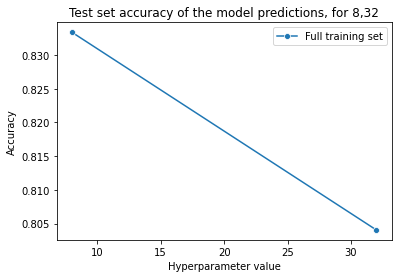

In [61]:
max_depth_range = [8, 32]
leaf = 1

acc = train_multiple_trees(max_depth_range, leaf)

visualize_accuracy(max_depth_range, acc)

0.7563797577854672
0.7563797577854672
0.810878027681661
0.8332612456747405
0.8133650519031141
0.8060121107266436


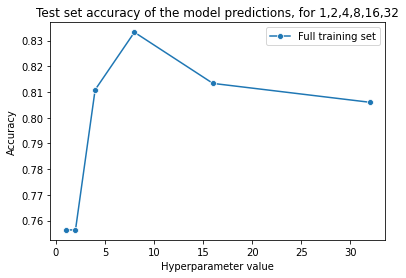

In [64]:
max_depth_range = [2**i for i in range(6)]
leaf = 1
acc = train_multiple_trees(max_depth_range, leaf)
        
visualize_accuracy(max_depth_range, acc)

## Part 5. Implement a KNN Classifier


Note: In this section you will train KNN classifiers using the same training and test data.

The code cell below contains a shell of a function named `train_test_knn()`. This function should train a KNN classifier on the training data, test the resulting model on the test data, and compute and return the accuracy score of the resulting predicted class labels on the test data. 

Remember to use ```KNeighborsClassifier()``` to create a model object and call the method with one parameter: `n_neighbors = k`. 

<b>Task:</b> Complete the function to make it work.

In [65]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    model = KNeighborsClassifier(k)
    
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    acc_score = accuracy_score(y_test, predictions)
    
    
    return acc_score

#### Train on Different Values of Hyperparameter K

<b>Task:</b> 

Just as you did above, complete function `train_multiple_knns()` in the code cell below. The function should train multiple KNN models and return a list of accuracy scores.

The function will:

1. accept list `k_range` as a parameter; this list will contain multiple values for hyperparameter $k$

2. loop over list `k_range` and at each iteration:

    a. index into list `k_range` to obtain a value for $k$<br>
    b. call `train_test_knn` with the training and test set, and the value of $k$<br>
    c. print the resulting accuracy score<br>
    d. append the accuracy score to list `accuracy_list` <br>


In [66]:
def train_multiple_knns(k_range):
    
    accuracy_list = []

    for k in k_range:
        indiv_acc = train_test_knn(X_train, X_test, Y_train, Y_test, k)
        print(indiv_acc)
        accuracy_list.append(indiv_acc)
            
    return accuracy_list

The code cell below uses your `train_multiple_knn()` function to train 3 KNN models, specifying three values for $k$: $3, 30$, and $300$. It calls function `visualize_accuracy()` to visualize the results. Note: this make take a second.

0.759515570934256
0.7755190311418685
0.7696799307958477


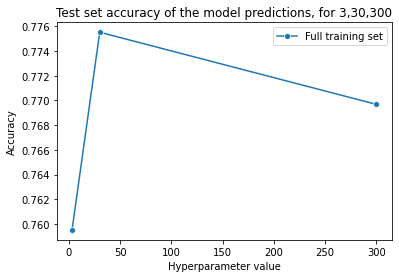

In [67]:
k_range = [3, 30, 300]
acc = train_multiple_knns(k_range)

visualize_accuracy(k_range, acc)

<b>Task:</b> Let's train on more values for $k$

In the code cell below:

1. call `train_multiple_knns()` with argument `k_range`
2. call `visualize_accuracy()` with arguments `k_range` and the resulting accuracy list obtained from `train_multiple_knns()`


0.7454584775086506
0.77530276816609
0.7654628027681661
0.7743295847750865
0.7730320069204152
0.7763840830449827
0.7754108996539792
0.776924740484429
0.77530276816609
0.7741133217993079
0.7756271626297578
0.7763840830449827
0.7749783737024222


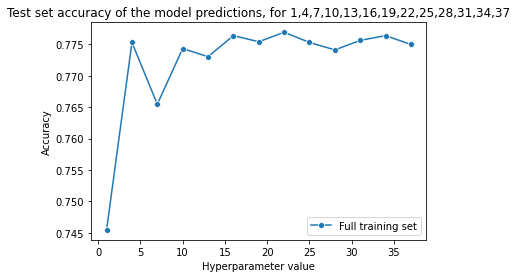

In [69]:
k_range = np.arange(1, 40, step = 3) 

acc = train_multiple_knns(k_range)

visualize_accuracy(k_range, acc)

#### Analysis & Conclusion

By comparing the performance of the KNN model relative to the Decision Tree model, it is clear that the KNN prediction accuracy is less than the accuracy of the decision tree model, but the KNN model's accuracy is almost always consistent: it is always around 77%. While the Decision Tree model outperforms the KNN model in terms of prediction accuracy in this specific case, the KNN model offers the advantage of consistent performance. Therefore, the choice between the two models should should depend on the specific requirements of the project, such as the need for high accuracy, consistency, interpretability, or computational efficiency.